Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

---

# Homework 2: VC Dimension, Decision Trees, Validaiton 



Name: Adam Ten Hoeve

## Part 1: VC Dimension

Answer the below questions by filling your answer in as markdown in the cells provided.

### Question 1 (This is a multipart question. Be sure to respond to each part).
1. For a given finite set of $N$ elements represented by the set A, what is the total number of possible binary labelings?

2. Let C(A) be the set of all distinct labelings of A generated by the hypothesis class C. What is the maximum size, |C(A)| of C(A)? We are asking in general, not for a specific C. Recall the |C(A)| means the number of elements in C(A). 
3. What happens if |C(A)| is smaller than the maximum size above?
4. Give a definition of shattering based on the above.
5. Give a definition of VC dimension using the above definition of shattering. 


Write the definition here.

1. Each element can have one of two labelings. For $N=1$ element, there are $2$ possible labelings. For $N=2$ elements, there are $2*2$ possible labelings. By abstracting this to $N$ elements in the set, there are $2^N$ possible labelings.
2. There are a maximum of $2^N$ distinct labelings. Therefor, if C(A) could classify all distinct labelings then $|C(A)| = 2^N$.
3. If $|C(A)| < 2^N$, there there must be some set of labelings that C(A) is unable to classify and will get incorrect if it attempts to label them.
4. Shattering is when a model can correctly classify all $2^N$ distinct points. If C(A) is unable to correctly classify all $2^N$ labels, then it is unable to shatter N points.
5. The VC dimension is the largest value of N such that a classifier C(A) is able to shatter all N points and unable to shatter N+1 points.

1.2: Consider the following: 

Let $A$ be a set of points on the real line, which each can be labeled as either +1 or -1.

Suppose you consider the hypothesis class given by the function $f: \mathbb{R} \rightarrow \mathbb{R}$ where $f$ is continuous and piecewise-linear. For each element $x \in A$, we label $x$ as $+1$ if $f(x) > 0$, otherwise we label it $-1$. If we restrict the number of different linear regions of $f$ to $N$, what is the VC dimension of $f$?

"Different linear regions" means what it sounds like, but here is what we mean formally:
The least number of non-intersecting intervals such that the union of the intervals is the whole real line and the slope of $f$ is different on an interval from the intervals immediately adjoining that interval.

For example, $f(x) = |x|$ has two linear regions, and 

$$ f(x) = \begin{cases}
      |x-2|, & \text{if}\ x > 0 \\
      |x+2|, & \text{otherwise}
    \end{cases} $$
    
has four linear regions.

Note: This problem is closely related to similar problems in understanding the complexity of neural networks.

Before we start answering this question, let's define a notation for the labelings. All points are being classified as either +1 or -1 along a 1-dimensional line (x being the only feature). Therefor, we shall define the labels of a combination of points as a string of '+' and '-' characters. For example, the string '+--' means there are 3 points, the leftmost (point 1) being classified as +1, then the middle (point 2) and rightmost point (being 3) classified as -1.

Lets explain this with some examples, and starting with the classifier $f(x) = |x|$. In this case, N = 2 and f(x) looks like a V, and that I will be referring to its area of classification as such.
* When $|A|=2$, there are two general combinations of labels: '++' and '+-'. We can flip the signs but the classifications on those other strings will be the same. 
    - '++': We can orient the classifier such that both points land to the left of the V section, thus both of them will have the same label. $\checkmark$
    - '+-': We can orient one point "outside" the classifier and one point inside, so they are both classified correctly. $\checkmark$
    - Therefor, the model shatters $|A|$=2.
* When $|A|$=3, there are 3 general label combinations: '+++', '++-', and '+-+'. Again, any other combination will be one of these with the signs flipped or the order reversed, but will still be classified the same way.
    - '+++': Similar to when N=2, we push the points to the left side of the classifier. $\checkmark$
    - '++-': We put the leftmost and middle points to be "outside" the V of the classifier and '-' to be inside. $\checkmark$
    - '+-+': The leftmost and rightmost points are "outside" the V and the middle point is "inside" the V. $\checkmark$
    - Therefor, $|A|$=3 is shattered.
* When $|A|$=4, there are 6 general label combinations: '++++', '+++-', '++-+', '++--', '+-+-' and '+--+'.
    - '++++': Position all 4 points to the left of the classifier, so they are all labeled the same. $\checkmark$
    - '+++-': Position the leftmost 3 points to the left of the classifier and the rightmost point "inside" the V. $\checkmark$
    - '++-+': Position the leftmost 2 points to the left of the V, the rightmost point to the right of the V, and the one opposite point "inside" the V. $\checkmark$
    - '++--': Position the leftmost 2 points to the left of the V and the rightmost 2 points inside the V. $\checkmark$
    - '+-+-': Position point 1 to the left of the V and point 3 to the right of the V. But this will then misclassify point 4 because it would also be to the right of the V. If we move the classifier so point 3 is inside the V, then point 1 will be misclassified. We can not classify this combaination of points. $\times$
* The model was able to shatter $|A|$=3 points but not $|A|$=4. Therefor it has a VC dimension of 3. Notice that this is N+1.

Now lets look at the piecewise $f(x)$ defined above. Lets try to find the VC dimension of that. Note that this function has N=4 linear dimensions. Note also that the piecewise function looks like a "W" and I will be referring to zones within the classifier as the left "V" and right "V".
* Going off of the pattern of the first example, lets start with $N+1 = 5$ points and see if we can shatter those. The general strings are: '+++++', '++++-', '+++-+', '++-++', '+++--', '++--+', '+-+-+' and '+---+.' This is going to take a while.
    - '+++++': Position all points to the left of the classifier. $\checkmark$
    - '++++-': Position the leftmost 4 points to the left of the left V and point 5 within one of the V's. $\checkmark$
    - '+++-+': Position the leftmost 3 points to the left of the left V, point 4 within the left V, and point 5 between the V's. $\checkmark$
    - '++-++': Position the leftmost 2 points to the left of the W, the rightmost 2 points to the right of the W, and the middle point within one of the Vs. $\checkmark$
    - '+++--': Position the leftmost 3 points to the left of the W, then place the rightmost 2 points into a V. $\checkmark$
    - '++--+': Position the leftmost 2 points to the left of the W, the rightmost point to the right of the W, and the other 2 points inside a V. $\checkmark$
    - '+-+-+': Point 1 to the left of the W, point 2 within the left V, point 3 between the Vs, point 4 within the right V, and point 5 to the right of the W. $\checkmark$
    - '+---+': Position point 1 to the left of the W, point 5 to the right of the W, and the other points inside the Vs. $\checkmark$
    - Therefor, $|A|$=5 is shattered.
* Now lets try $|A|=6$
    - For the sake of brevity, let's try the string '+-+-+-' first. We will see that it will be unable to classify this sting as there will always be two points of different labels that lie outside the W, which will be an incorrect labeling.
    - The model is unable to shatter $|A|=6$ points.
* The model was able to shatter 5 points but not 6 points. Therefor, it has a VC dimension of 5. Again, this is N+1.

Using these two examples, we can see a general pattern. Each piecewise classifier with N linear regions will have N+1 possible "spaces" where a point can exist, 2 outside the classifier and N-1 within the bounds of the classifier. Therefor, it will be able to correctly classify N+1 points with any possible labeling. However, N+2 points in an alternating pattern will always have 2 points on the outside with different labels because each of the N other "spaces" will contain a single point. Therefor, the VC dimension of $f$ is $N+1$.

***

1.3: Consider the following: Your data consists of points situated along the unit circle (they cannot be inside or outside of the circle, only on the boundary/line defined by the circle). What is the VC dimension of the hypothesis class defined by quadralaterals inscribed in the circle? (The corners of the quadrilateral must be on the circle).

Let's start with 4 data points on the circle, because that seems logical. 
* If any of the points are labeled +1, then they will be able to be classified by placing one of the corners of the quadrilateral on that point. This works even if all 4 points are labeled +1. This is true no matter where the 4 points are located on the circle.
* If any of the points are labeled -1, then the can be classified as such by not placing a corner on that point. This remains true for any number of points.
* Therefor, the hypothesis class shatters 4 points.

With 5 points, the easiest way to prove that it can not be shattered is by labeling all thep points as +1. No matter where the points are located, there are only 4 corners to the quadralateral, so it is impossible for all the points to be correctly labeled as +1. Thus, the hypothesis class can not shatter 5 points.

Therefor, the VC dimension is 4.

1.4:
For a set of $N$ points $X$, if a hypothesis class $C$ has VC dimension $D$, give two **upper bounds** on how many binary labelings there for the application of $C$ to $X$. Which upper bound is tighter and when?

We know from question 1 that there is an upper bound on the total number of possible labelings, this being $O(2^N)$. However, because we know that the VC dimension is finite, we can use Sauer's Lemma to create a second upper bound on the data: $O(N^D)$. This can be though of as the number of ways of choosing D items from a set of size N. So long as $N \ge D \ge 1$, Sauer's Lemma gives us a much tighter bound. 

## Part 2: Decision Tree and Validaiton 

We will use a pre-processed natural language dataset.

**Task**:

Classify emails as "spam" or "not spam" based on word frequency data. 

**Dataset**:

Our dataset is contained in the CSV file "spamdata.csv". Each row contains the word frequency for 54 words plus statistics on the longest "run" of captial letters. 

Word frequency is given by:

$$ f_i = m_i / N $$ 

Where $f_i$ is the frequency for word $i$, $m_i$ is the number of times word $i$ appears in the email, and $N$ is the total number of words in the email.

We wrote a function below that reads in the data, splits it into a train and test set, and also gives you the names for the feature columns.

**Method**:

We will use decision trees to classify the emails.

In [3]:
import numpy as np
from matplotlib import pyplot as plt


### Loading the Data

Below you will implement a function to load the .csv file "spamdata.csv" which has been provided for you. The function must:

1. Shuffle the dataset
2. Split into training and testing splits based off of the parameter test_split
3. Return both training and testing data (features and labels each).

You can use Numpy, Pandas, and Scikit learn functions to accomplish this. 
You may use the Scikit-Learn function `train_test_split`.

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd


def get_spam_dataset(filepath="./spamdata.csv", test_split=0.1):
    '''
    get_spam_dataset
    
    Loads csv file located at "filepath". Shuffles the data and splits
    it so that the you have (1-test_split)*100% training examples and 
    (test_split)*100% testing examples.
    
    Args:
        filepath: location of the csv file
        test_split: percentage/100 of the data should be the testing split
        
    Returns:
        X_train, X_test, y_train, y_test, feature_names
        
        (in that order)
        first four are  np.ndarray
        
    '''
    
    # YOUR CODE HERE
    # Read the dataframe
    df = pd.read_csv(filepath, sep=" ", header=0)
    
    # Shuffle and Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], 
                                                        test_size=test_split, shuffle=True, random_state=123)
    return X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy(), df.columns

In [5]:
# Sanity check tests - not comprehensive
X_train, X_test, y_train, y_test, feature_names = get_spam_dataset()
assert(type(X_train) == np.ndarray)
assert(type(X_test) == np.ndarray)
assert(type(y_train) == np.ndarray)
assert(type(y_test) == np.ndarray)

assert(np.sum(y_test == 1.0) > 0)
assert(np.sum(y_train == 0.0) > 0)

assert(X_train.shape[0] == 4140)
assert(X_train.shape[1] == 57)
assert(y_test.shape[0] == 461)

print("Feature names: {}".format(feature_names))

Feature names: Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_fre

### 2.0: Data Exploration Part 1

In the cell below, perform some initial analysis on the dataset. You must **at least answer the below two questions:**

1. Do we have a balanced set of examples (equal amount of SPAM and NOT SPAM examples) in the training and test datasets? 
2. Try to figure out with a couple plots which words have the biggest impact on an example being SPAM vs. NOT SPAM. Hint: calculate the emperical conditional probability $p(y=SPAM|x>t)$ for each feature $x$ and a reasonable threshold $t$.

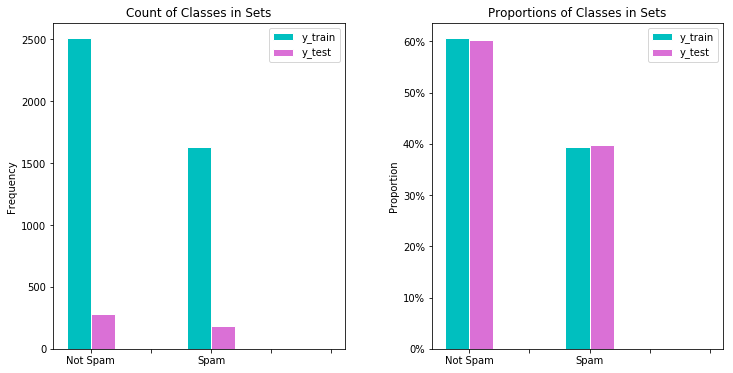

In [6]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
bar_width = 0.2
plt.subplots_adjust(wspace=0.3)

ax[0].hist(y_train, bins=np.arange(3)-bar_width, width=bar_width,
           color="c", edgecolor="white", label="y_train")
ax[0].hist(y_test, bins=np.arange(3), width=bar_width,
           color="orchid", edgecolor="white", label="y_test")
ax[0].set_title("Count of Classes in Sets")
ax[0].set_xticklabels(["", "Not Spam", "", "Spam", "", ""])
ax[0].set_ylabel("Frequency")
ax[0].legend()

ax[1].hist(y_train, density=True, bins=np.arange(3)-bar_width, width=bar_width,
           color="c", edgecolor="white", label="y_train")
ax[1].hist(y_test, density=True, bins=np.arange(3), width=bar_width,
           color="orchid", edgecolor="white", label="y_test")
ax[1].set_title("Proportions of Classes in Sets")
ax[1].set_xticklabels(["", "Not Spam", "", "Spam", "", ""])
ax[1].set_ylabel("Proportion")
ax[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax[1].legend();

From the plot, we can see that we do not have an equal amount of SPAM and NOT_SPAM data points. We can gether that $\sim 0.6$ of the data comes from NOT SPAM and $\sim 0.4$ comes from SPAM. 

In [7]:
probs = np.zeros(X_train.shape[1])
for i in range(X_train.shape[1]):
    feature_vals = X_train[:, i]
    # Set the threshold to be the mean of the values
    threshold = np.mean(feature_vals)
    # Find all rows that are greater than the threshold
    x_greater_t = np.array([feature_vals > threshold])
    # Compare number above threshold to those that are spam
    spam_above_threshold = [1 if val == y_train.astype(bool)[index] and val == 1 else 0 for index, val in enumerate(x_greater_t[0])]
    # Calculate prob based on number that were the same
    probs[i] = np.sum(spam_above_threshold) / X_train.shape[0]

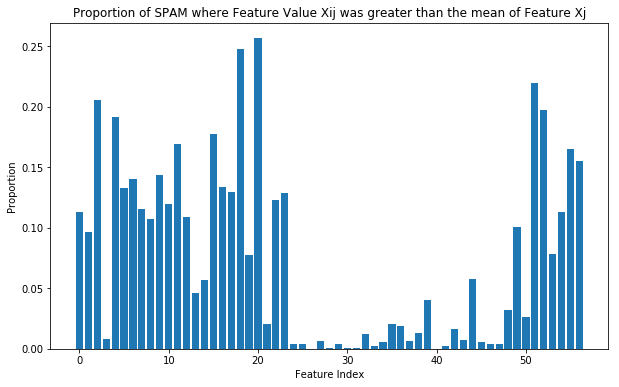

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(np.arange(X_train.shape[1]), probs)
ax.set_title("Proportion of SPAM where Feature Value Xij was greater than the mean of Feature Xj")
ax.set_ylabel("Proportion")
ax.set_xlabel("Feature Index");

In [9]:
# Finds the indexes of the 5 features that have the highest conditional probability
largest_indexes = probs.argsort()[::-1][:5]
# Gets the feature_names from those indexes
feature_names[largest_indexes]

Index(['word_freq_your', 'word_freq_you', 'char_freq_!', 'word_freq_all',
       'char_freq_$'],
      dtype='object')

From the plot, we can see that the conditional probabilities mainly vary between three distinct heights, on $[0.0, 0.05]$ and $[0.10, 0.15]$ with a few probabilities reaching to $[0.18, 0.26]$. By printing out the 5 largest probabilites, we can see that the features with the highest conditional probabilities were 'freq_your', 'freq_you', 'freq_!", 'freq_all', and 'freq_$'. It makes sense that the probability of spam, given these symbols is higher because, in real life, many SPAM files contain offers to the reciever, usually in terms of money, and contain lots of punctionation, whereas NOT SPAM messages contain fewer of these strings.

### 2.1: Develop the Model

Fill out the below functios that construct your Scikit-Learn model.

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix


def build_dt_class_model(data_X, data_y, max_depth = None):
    '''
    This function builds the decision tree classifier and 
    fits it to the provided data.
    
    Arguments
        data_X - a np.ndarray
        data_y - np.ndarray
        max_depth - None if unrestricted, otherwise an integer for the maximum
                depth the tree can reach.
    
    Returns:
        A trained DecisionTreeClassifier
    '''
    
    # YOUR CODE HERE
    dtc = DecisionTreeClassifier(max_depth=max_depth)
    dtc.fit(data_X, data_y)
    return(dtc)

[]

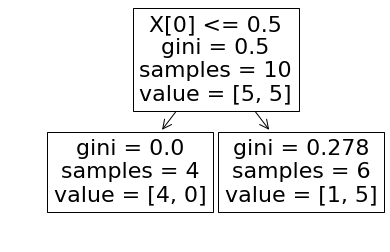

In [11]:
# Sanity check tests
x_ut = np.zeros((10,2))
y_ut = np.zeros((10,))
x_ut[0:6,0] = np.ones_like(x_ut[0:6,0])
x_ut[0,:2] = 1
x_ut[0,8:] = 1
y_ut[0:5] = np.ones_like(y_ut[0:5])
dt_model = build_dt_class_model(x_ut, y_ut, 1)

assert(type(dt_model) == DecisionTreeClassifier)
x_ut_test = np.array([[0.0, 0.0], [1.0, 1.0]])
y_hat_ut = dt_model.predict(x_ut_test)
assert(y_hat_ut[0] == 0)
assert(y_hat_ut[1] == 1)
assert(dt_model.get_depth() == 1)

plot_tree(dt_model)
plt.plot()

### Precision and Recall Functions 

Fill in the below functions that calculate precision and recall based on vectors of labels and vectors of predictions. 

This is a binary classificaiton problem, therefore we can label all points as either positive (SPAM) or negative (NOT SPAM). 

"True postives" (TP) are emails we predict to be SPAM, and those emails also have true label SPAM.
"False positives" (FP) are emails we predict to be SPAM but have true label NOT SPAM. 

The same reasoning applies to "true negative" (TN) and "false negative" (FN). 

Precision is: (TP)/(TP + FP). Note the denominator is the number of positive predictions. 

Thus precision is roughly a measure of how "useful" your positive predicitons are. 

Recall is: (TP)/(TP+FN). Note the denominator is thenumber of positive labels. 

Thus recall is roughly a measure of how "complete" your positive predictions are. 

In [12]:
def calculate_precision(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates precision for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    
    # YOUR CODE HERE
    conf_matrix = confusion_matrix(y_true, y_pred)
    TP = conf_matrix[1, 1]
    FP = conf_matrix[0, 1]
    
    precision = TP / (TP + FP)
    
    return precision

def calculate_recall(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates recall for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    
    # YOUR CODE HERE
    conf_matrix = confusion_matrix(y_true, y_pred)
    TP = conf_matrix[1, 1]
    FP = conf_matrix[1, 0]
    
    recall = TP / (TP + FP)
        
    return recall

In [13]:
# Sanity check tests
ut_true = np.array([1.0, 1.0, 0.0, 0.0])
ut_pred = np.array([1.0, 1.0, 1.0, 1.0])
prec = calculate_precision(ut_true, ut_pred, 1.0)
recall = calculate_recall(ut_true, ut_pred, 1.0)
print(prec)
print(recall)
assert(prec == 0.5)
assert(recall == 1.0)

0.5
1.0


### 2.2: Analyze and Interpret the Model

In this section we will analyze the performance of our model on the Spam dataset. We will attempt to understand how the model makes decisions and why a particular split was chosen in the beginning levels of the tree (close to the root).

Unlike the last homework, less is written out before hand for you. You must write all the code to perform the analysis.

1. To avoid touching the test set, split the X_train and y_train arrays into X_train, y_train, and X_valid, y_valid datasets. Use ~10% of the training datset for the validation.

2. Create a model with a shallow max_depth of 2. Build the model on the training set.

3. Report precision/recall on the training and validation sets.

4. Report depth of the tree.

5. Plot the tree using the `plot_tree` function. 

You may want to use `plt.figure(figsize=(10,10))` to make the tree plot bigger.

The precision of the model on the training set is 0.8973
The recall of the model on the training set is 0.6746
The precision of the model on the validation set is 0.8769
The recall of the model on the validation set is 0.6826
The depth of the tree is 2.


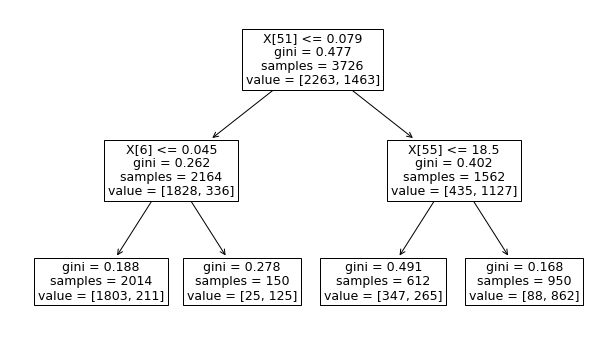

In [14]:
# First line here resets the X_train, y_train values. 
X_train, X_test, y_train, y_test, feature_names = get_spam_dataset()

# YOUR CODE HERE
# 1. Create validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=123)

# 2. Create model with max_depth 2.
dtc = build_dt_class_model(X_train, y_train, max_depth=2)
pred_train = dtc.predict(X_train)
pred_valid = dtc.predict(X_valid)

# 3. Get precision and recall
train_precision = calculate_precision(y_train, pred_train)
train_recall = calculate_recall(y_train, pred_train)
print("The precision of the model on the training set is {:0.4f}".format(train_precision))
print("The recall of the model on the training set is {:0.4f}".format(train_recall))

valid_precision = calculate_precision(y_valid, pred_valid)
valid_recall = calculate_recall(y_valid, pred_valid)
print("The precision of the model on the validation set is {:0.4f}".format(valid_precision))
print("The recall of the model on the validation set is {:0.4f}".format(valid_recall))

# 4. Report depth of tree
print("The depth of the tree is {}.".format(dtc.get_depth()))

# 5. Plot the tree
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_tree(dtc, ax=ax);

Now you must interpret the model. We provide one cell for you to write your answers in markdown and one cell for you to write any extra code.
    
1. Describe which features the tree uses to make the decisions, and how they influence the SPAM/NOT SPAM decision. You should be refering to 3 different features for depth of 2. Use the text names of the features, not their indices.


In [15]:
# YOUR CODE HERE
tree_feature_indexes = [51, 6, 55]
feature_names[tree_feature_indexes]

Index(['char_freq_!', 'word_freq_remove', 'capital_run_length_longest'], dtype='object')

The three features that the decision tree used to classify the data were 'char_freq_!', 'word_freq_remove', 'capital_run_length_longest.'

The first feature that the tree uses to classify the data is the 'char_freq_!' feature. If the 'char_freq_!' value for a data point is was greater than $0.079$, then it is more likely to be classified as SPAM.

If the 'char_freq_!' value was greater than $0.079$, then it would be classified based on the 'capital_run_length_longest' feature. If the value was less than or equal to $18.5$, then it would be classified as NOT SPAM. Tbis was the path with the greatest gini error in the model, so it's likely that another branch could be added to that node to reduce that error. Counter to that, If the 'capital_run_length_longest' was greater than $18.5$, then the point would be classified as SPAM, which was faily correct.

If the 'char_freq_!' value was less than or equal to $0.079$, then the point would be classified based on the 'word_freq_remove' feature. If its value was less than or equal to $0.045$, then it would be classified as NOT SPAM. This was also a fairly accurate path for determining if the datapoint was SPAM, with a gini error of $0.188$. If the 'word_freq_remove' feature was greater than $0.045$, then it would be classifed as SPAM, with a gini error of $0.278$, which is fairly accurate.

### 2.2: Perform  Validation to Select the Depth Parameter 

In this section we will perform validation to selectthe depth parameter. Unlike in class, this time we will ask you to perform validation using a random subsample of 25% of the training data. Your task is the following:

1. It is recommended in the beginning of your code to call `X_train, X_test, y_train, y_test = get_spam_dataset()` to reset the data variables. Only call this once in the cell.
2. Split off a valiation dataset with ~25% of your training dataset. Do this only once in your cell. All models you build will be evaluated on this same validation dataset. 
2. Write code that builds a models for max_depths of within a range of values (a good set might be 20 numbers in the interval 1-40). You should get the precision and recall performance on the validation set and store them in arrays.

Once you have the above, you should generate two plots:

1. The first plot should plot two lines - the precision and recall performance. The x-axis should be your `max_depth` values and the y_axis should be between 0 and 1. Include a legend (`plt.legend`) and label the precision and recall lines.

2. Create a scatter plot (not a line plot) that scatters your precision and recall values so that precision is the y axis and recall is your x axis.


In [37]:
X_train, X_test, y_train, y_test, feature_names = get_spam_dataset()

# YOUR CODE HERE
# Create a validation set from 0.25 of the training set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, random_state=123)
# Initalize max_depths, precsion and recall
max_depths = np.arange(1, 40, 2)
precision_scores = np.zeros(len(max_depths))
recall_scores = np.zeros(len(max_depths))
# Initialize actaul_tree_depth for analysis question 0
actual_tree_depth = np.zeros(len(max_depths))

for index, max_depth in enumerate(max_depths):
    # Create the model and classify the validation set
    model = build_dt_class_model(X_train, y_train, max_depth=max_depth)
    pred_valid = model.predict(X_valid)
    # Calculate the precision and recall for the model
    precision_scores[index] = calculate_precision(y_valid, pred_valid)
    recall_scores[index] = calculate_recall(y_valid, pred_valid)
    # Find the tree's actual depth for analysis
    actual_tree_depth[index] = model.get_depth()

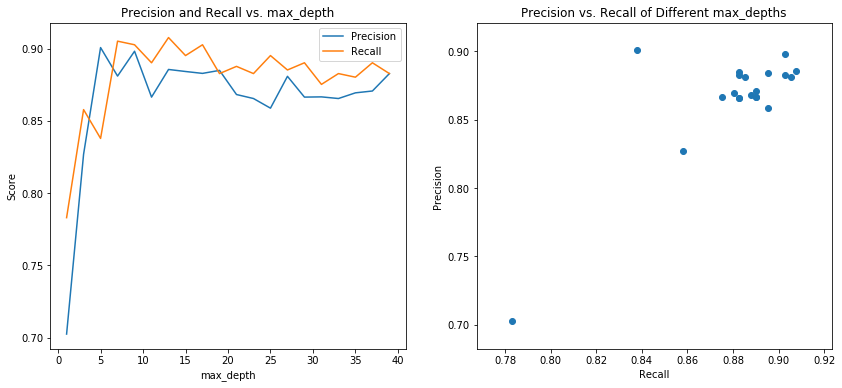

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(max_depths, precision_scores, label="Precision")
ax[0].plot(max_depths, recall_scores, label="Recall")
ax[0].set_xlabel("max_depth")
ax[0].set_ylabel("Score")
ax[0].set_title("Precision and Recall vs. max_depth")
ax[0].legend()

ax[1].scatter(x=recall_scores, y=precision_scores)
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
ax[1].set_title("Precision vs. Recall of Different max_depths");

### Analysis

Answer the below question regarding the output you generated above (short answer, 2-3 sentances each please):

0. Just because we let max_depth increase doesn't mean the depth actually goes to that depth. Report the maximal true depth the model reaches for the largest max_depth parameter you test.
1. Does the classifier max_depth which has the best RECALL performance also have the best PRECISION performance? 
2. Why would you choose a classifier based on RECALL rather than PRECISION or vice versa? How would you make your selection for this dataset? 
3. What general trends do you observe in recall and precision performance as the max depth parameter increases? Because your validation split is random, you can try re-running multiple times to see what happens.

# 0

In [71]:
# Find maximal depth
print("0. The maximal depth that any of the decision trees reached was {}".format(np.max(actual_tree_depth)))

0. The maximal depth that any of the decision trees reached was 30.0


***

# 1

In [41]:
max_precision_index = np.where(precision_scores == np.max(precision_scores))[0][0]
max_recall_index = np.where(recall_scores == np.max(recall_scores))[0][0]

max_precision_point = tuple((recall_scores[max_precision_index], precision_scores[max_precision_index]))
max_recall_point = tuple((recall_scores[max_recall_index], precision_scores[max_recall_index]))

print("The location with the highest precision was ({:0.4f}, {:0.4f})".format(max_precision_point[0], max_precision_point[1]))
print("The location with the highest recall was ({:0.4f}, {:0.4f})".format(max_recall_point[0], max_recall_point[1]))

The location with the highest precision was (0.8379, 0.9008)
The location with the highest recall was (0.9077, 0.8856)


From the code cell above, we can see that the point with the highest precision was not the same as the point with the highest recall.

***

# 2

The largest F_score was 0.9005 from a max_depth of 9


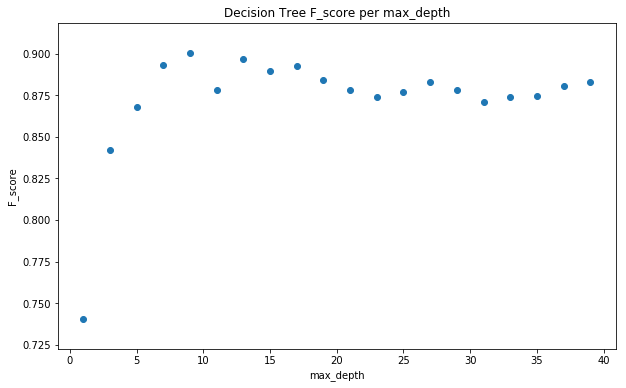

In [52]:
F_scores = 2 * precision_scores * recall_scores / (precision_scores + recall_scores)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(max_depths, F_scores)
ax.set_title("Decision Tree F_score per max_depth")
ax.set_ylabel("F_score")
ax.set_xlabel("max_depth");

max_f = np.max(F_scores)
max_f_index = np.where(F_scores == np.max(F_scores))[0][0]
max_f_depth = max_depths[max_f_index]

print("The largest F_score was {:0.4f} from a max_depth of {}".format(max_f, max_f_depth))

In this example, precision is the ratio of the number of samples that were actually SPAM out of the number of samples that were classified as SPAM. A high precision then means that, of the values that were classified, many of them were actually SPAM. 

Recall is the ratio of the number of samples that were correctly classified as SPAM out of the total number of SPAM samples. A high recall means that, of the total number of SPAM samples, many of them were correctly classified by the model.

For any model, we want these two scores to be as close to 1 as possible. But having a model with the highest precision score is unlikely to also have the highest recall score, as shown in analysis question 1, because there is a tradeoff between true positive rate and false positive rate. We want to select the model that optimizes both of these points, without significantly sacrificing one for the other. This can be done in a few different ways but one common way is an F-score. 

$$ F\_score = 2 \big( \dfrac{precision * recall}{precision + recall} \big) $$

From the code cell above, we can see that the max_depth of $9$ led to the largest F_score of $0.9005$, therefor this would be a educated decision on which max_depth to chose.

# 3

Some trends we can see is that the precision and recall of the models drastically increase until the model is has a max_depth of $\sim 5$. After that, both scores are fairly stable, maintaining scores between $[0.87, 0.90]$. This means that the model is not getting significanly better even though we're adding more branches. In fact, we can also notice that, in general, all the precision and recall scores with a max_depth > $\sim 15$ are less than the scores from max_depths $[7, 15]$. This likely means that the models are overfitting the data and adding branches that do not improve the classification of SPAM in the general distribution.

We can also observe that recall is generally higher than precision for most of decision trees.

### Final Test Assessment 

For your final task, select a value for `max_depth` based on your analysis above. We provide a code cell and a markdown cell. In the code cell:

1. Re-fit the classifier using all the training data using your value for `max_depth`.
2. Predict and report precision/recall on the test set. 

In the markdown cell:

1. Explain why you chose the `max_depth` parameter. (There's not necessarily one right answer to this). But if you are classifying emails, you probably don't want to OVER classify as spam and filter out important emails, unless you are deathly allergic to SPAM. 

In [65]:
# YOUR CODE HERE
max_depth = max_f_depth  # The max_depth with the largest f_score from the above analysis
# Get the data into training and test sets
X_train, X_test, y_train, y_test, feature_names = get_spam_dataset()
# Fit the model to the training set
dtc = build_dt_class_model(X_train, y_train, max_depth=max_depth)
pred_test = dtc.predict(X_test)

# Get precision and recall
test_precision = calculate_precision(y_test, pred_test)
test_recall = calculate_recall(y_test, pred_test)
print("The precision of the model with max_depth={} on the test set is {:0.4f}".format(max_depth, test_precision))
print("The recall of the model with max_depth={} on the test set is {:0.4f}".format(max_depth, test_recall))

The precision of the model with max_depth=9 on the test set is 0.9581
The recall of the model with max_depth=9 on the test set is 0.8743


For my max_depth parameter, I used whatever max_depth gave me the highest F_score because that gives me a numeric value estimating where the true positive and false positve tradeoff is optimized. For this iteration, this turned out to be 9 makes sense as to have enough branches to capture some of the nuances of the data but not large enough to overfit to the training set. 